## **Linear vs. Nonlinear**

The "make_moons" data creation routine in sklearn produces non-linear data that is useful for understanding the difference between linear and non-linear classifiers.  he 

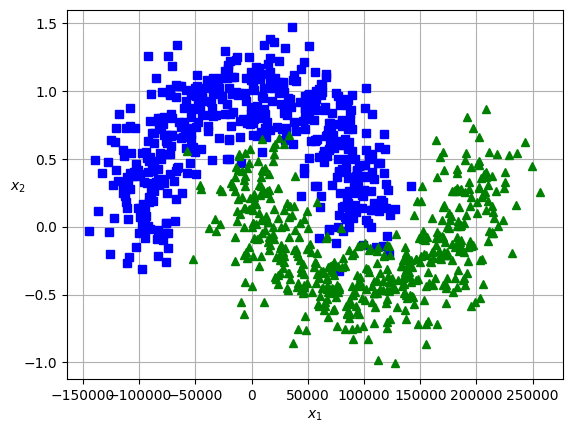

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X[:,0] = X[:,0]*100000


def plot_dataset(X, y, axes=None):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    if axes:
        plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plot_dataset(X, y)

**Exercise 1**

Using a simple train test split, run a simple LogisticRegression classifier on the above data. Try different solvers.  Which works the best?

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train,  y_test = train_test_split(X,y,random_state=42)

for solver in ['sag','saga','lbfgs']:
    lr_clf = LogisticRegression(solver=solver)
    lr_clf.fit(X_train,y_train)
    y_pred = lr_clf.predict(X_test)

    print(f"{solver} - {accuracy_score(y_test,y_pred)}")

sag - 0.672
saga - 0.672
lbfgs - 0.672


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**Exercise 2**

Note that the two dimensions have vastly different magnitudes. Modify the above, using a standard scaler and pipeline to transform the data.  Does it help?  Do the different solvers have the same relative performance?

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train,  y_test = train_test_split(X,y)

#lr_clf = LogisticRegression(solver="saga")


for solver in ['sag','saga','lbfgs']:
    lr_clf = LogisticRegression(solver=solver)
    pipeline = make_pipeline(StandardScaler(),lr_clf)

    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_test)
    print(f"{solver} - {accuracy_score(y_test,y_pred)}")



sag - 0.876
saga - 0.876
lbfgs - 0.876


**Exercise 3**

Try the different following methods to classify your data:

1) GaussianNB
2) KNN (pick the best "nearest neighbors" parameter you can)
3) SVC, linear kernel
4) SVC, poly kernel
5) SVC, rbf kernel

Which performs the best?  Why do you think that is?

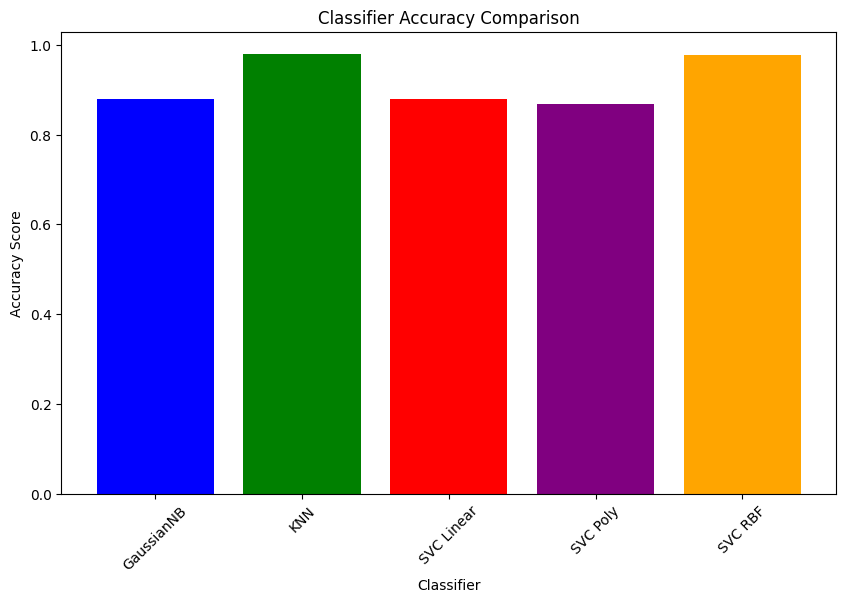

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Assuming X and y have been defined previously

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Define classifiers to test
classifiers = {
    'GaussianNB': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'SVC Linear': SVC(kernel='linear'),
    'SVC Poly': SVC(kernel='poly'),
    'SVC RBF': SVC(kernel='rbf')
}

# Dictionary to hold accuracy scores
accuracy_scores = {}

# Loop through classifiers
for name, clf in classifiers.items():
    # Create pipeline with standard scaler and classifier
    pipeline = make_pipeline(StandardScaler(), clf)
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy

# Plotting results
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.title('Classifier Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()

**Exercise 4**

In the following, I've set up some code to explore the impact of different parameters and data on an SVC.  As implemented, the current code illustrates how an 'rbf' kernel can overfit the data.  Vary the parameters to examine how different parameters influence performance and overfitting.

1) Try changing the amount of noise in the dataset.  What happens?
2) Try changing the parameter 'gamma.'  What setting seems to avoid overfitting while still performing well.  Have a look at the SVC [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) so you have an understanding of what's going on.
3) Try changing the kernel to a 'poly' kernel, and modify gamma as necessary.  How does this affect performance?

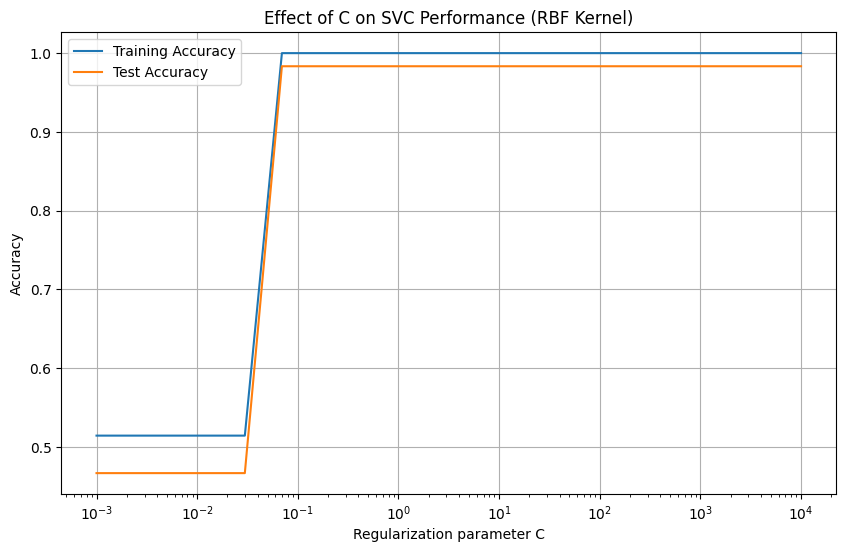

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a noisy moons dataset
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Range of C values to explore
C_values = np.logspace(-3, 4, 20)  # From very small to somewhat larger (10^4) C values
train_scores = []
test_scores = []

# Explore the effect of C
for C in C_values:
    clf = SVC(C=C, kernel='rbf', gamma=6)  # Using 'scale' for gamma as an example
    clf.fit(X_train, y_train)
    
    # Record training and test scores
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

# Plotting
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, train_scores, label='Training Accuracy')
plt.semilogx(C_values, test_scores, label='Test Accuracy')
plt.legend()
plt.xlabel('Regularization parameter C')
plt.ylabel('Accuracy')
plt.title('Effect of C on SVC Performance (RBF Kernel)')
plt.grid(True)
plt.show()